In [22]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

news_df = pd.read_csv("./보배드림 뉴스 크롤링.csv")
news_df = news_df.drop(['내용'], axis=1)
news_df.head()

,제목,날짜,추천수,조회수
0,"법원 ""교통사고 가해측 보험사는 피해차 가치 하락도 배상해야""",05/03,5.0,692.0
1,"에디슨EV ""채권자가 법원에 파산 신청…채권액 36억원""",05/06,3.0,1266.0
2,"기아, 신형 니로 EV 사전계약 실시…1회 충전에 401㎞ 주..",05/03,2.0,1452.0
3,"현대차, 3년 만에 유관중으로 `현대 N 페스티벌` 개최",05/03,1.0,260.0
4,호세 무뇨스 현대차 사장 이사회 합류…글로벌시장 챙긴다,05/04,1.0,274.0


In [246]:
from eunjeon import Mecab

tagger=Mecab()
significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

def tagging_text(texts):
    corpus = []
    for text in texts:
        text = tagger.pos(text)
        for i in range(len(text)-1):
            if text[i][1] in significant_tags:
                corpus.append(f"{text[i][0]}/{text[i][1]}")
    return corpus

In [274]:
tagger.pos("교통사고 가해측")

[('교통사고', 'NNG'), ('가', 'JKS'), ('해', 'NNG'), ('측', 'NNB')]

In [247]:
tagged_corpus = tagging_text(news_df.제목)

for i in range(5):
    print(tagged_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [228]:
import re

p1 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XS.')
p2 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XSA [가-힣A-Za-z0-9]+/VX')
p3 = re.compile('[가-힣A-Za-z0-9]+/VV')
p4 = re.compile('[가-힣A-Za-z0-9]+/VX')

In [233]:
def stemming_text(text):
    corpus = []
    for sent in text:
        ori_sent = sent
        mached_terms = re.findall(p1, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        
        mached_terms = re.findall(p2, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                if tag != 'VX':
                    modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p3, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p4, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        corpus.append(ori_sent)
    return corpus

In [234]:
stem_corpus = stemming_text(tagged_corpus)

for i in range(0, 5):
    print(stem_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [255]:
stopwords = ['이/VCP','나오/VV','있/VA','가지/VV','하/VV','씨/NNB','것/NNB','시키/XSV','들/XSN',
'만들/VV','그/MM','지금/NNG'	,'되/VV','생각하/VV','수/NNB','그러/VV'	,'이/NP','속/NNG','보/VX',
'하나/NR','않/VX','집/NNG','없/VA','살/VV','나/NP','모르/VV','사람/NNG','적/XSN','주/VV','월/NNB',
'아니/VCN','데/NNB','등/NNB','자신/NNG','같/VA','안/MAG','우리/NP','어떤/MM','때/NNG','내/NP','년/NNB',
'내/VV','가/VV','경우/NNG','한/MM','명/NNB','지/VX','생각/NNG','대하/VV','시간/NNG','오/VV','그녀/NP',
'말/NNG','다시/MAG','일/NNG','이런/MM','그렇/VA','앞/NNG','위하/VV','보이/VV','때문/NNB','번/NNB',
'그것/NP','나/VX','두/VV','다른/MM','말하/VV','어떻/VA','알/VV','여자/NNG','그러나/MAJ','개/NNB',
'받/VV','전/NNG','못하/VX','들/VV','일/NNB','사실/NNG','그런/MM','이렇/VA','또/MAG','점/NNG','문제/NNG',
'싶/VX','더/MAG','말/VX','사회/NNG','정도/NNG','많/VA','좀/MAG','그리고/MAJ','원/NNB','좋/VA','잘/MAG',
'크/VA','통하/VV','따르/VV','소리/NNG','중/NNB','놓/VX']

In [253]:
def remove_stopword_text(text):
    corpus = []
    for sent in text:
        modi_sent = []
        for word in sent.split(' '):
            if word not in stopwords:
                modi_sent.append(word)
        corpus.append(' '.join(modi_sent))
    return corpus

In [256]:
removed_stopword_corpus = remove_stopword_text(stem_corpus)

for i in range(5):
    print(removed_stopword_corpus[i])

법원/NNG
교통사고/NNG
해/NNG
측/NNB
보험/NNG


In [305]:
comm_df = pd.read_excel("./대화_데이터셋.xlsx")
comm_df.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0


In [306]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(comm_df, test_size=0.15, random_state=3)
print(len(train))
print(len(test))

23686
4180


   Emotion  count
0        0  18540
1        1   5146


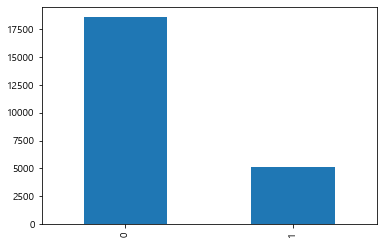

In [307]:
train['Emotion'].value_counts().plot(kind = 'bar')
print(train.groupby('Emotion').size().reset_index(name = 'count'))